In [1]:
import os
#import re
import glob
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_context("paper")

In [2]:
pd.__version__

'1.0.3'

In [3]:
test_csvs = glob.glob("*compare.csv.gz")
#test_csvs = ["data-d0.05-f1-gamma.compare.csv.gz"]


In [4]:
compareDF = pd.concat([pd.read_csv(csv, sep=",", compression="gzip").assign(fileinfo=os.path.basename(csv).rsplit(".compare.csv.gz")[0]) for csv in test_csvs])#, ignore_index=True)

In [5]:
compareDF#["p-distance"]

,seed,freq(T),freq(C),freq(A),freq(G),rate(C-T),rate(A-T),rate(G-T),rate(A-C),rate(C-G),...,hp-k37-scaled100.containment-pdist,hp-k39-scaled100.jaccard,hp-k39-scaled100.jaccard-pdist,hp-k39-scaled100.containment,hp-k39-scaled100.containment-pdist,hp-k42-scaled100.jaccard,hp-k42-scaled100.jaccard-pdist,hp-k42-scaled100.containment,hp-k42-scaled100.containment-pdist,fileinfo
0,401,0.40,0.10,0.40,0.10,1.97317,0.318617,0.254462,0.392149,0.342666,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,data-d0.80-f3-nogam.dnainput
1,402,0.40,0.10,0.40,0.10,1.56132,0.288578,0.305373,0.500360,0.773037,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,data-d0.80-f3-nogam.dnainput
2,403,0.40,0.10,0.40,0.10,1.46133,0.161923,0.271187,0.397400,0.099924,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,data-d0.80-f3-nogam.dnainput
3,404,0.40,0.10,0.40,0.10,1.58037,0.340743,0.287048,0.508184,0.792160,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,data-d0.80-f3-nogam.dnainput
4,405,0.40,0.10,0.40,0.10,1.89283,0.199618,0.274997,0.417000,0.494852,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,data-d0.80-f3-nogam.dnainput
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,0.25,0.25,0.25,0.25,2.12115,0.433461,0.390442,0.429627,0.418261,...,0.103944,0.003067,0.122512,0.006253,0.106410,0.002455,0.118948,0.005004,0.103938,data-d0.15-f1-gamma.dnainput
196,197,0.25,0.25,0.25,0.25,1.37466,0.326142,0.317280,0.522544,0.966229,...,0.106780,0.002939,0.123466,0.006010,0.107312,0.001941,0.123858,0.003954,0.108930,data-d0.15-f1-gamma.dnainput
197,198,0.25,0.25,0.25,0.25,1.55224,0.333574,0.331005,0.495819,0.897968,...,0.107531,0.003040,0.122711,0.006084,0.107033,0.002108,0.122137,0.004212,0.107592,data-d0.15-f1-gamma.dnainput
198,199,0.25,0.25,0.25,0.25,1.90767,0.617605,0.187626,0.495055,0.506380,...,0.108773,0.002641,0.125856,0.005270,0.110296,0.001741,0.126120,0.003484,0.111599,data-d0.15-f1-gamma.dnainput


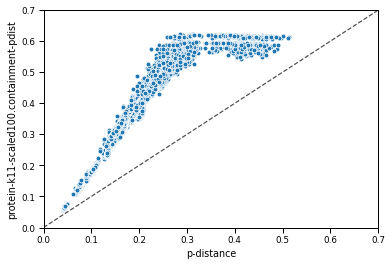

In [24]:
g=sns.scatterplot(data=compareDF, x="p-distance", y="protein-k11-scaled100.containment-pdist",palette="GnBu_d")
g.set(ylim=(0, 0.7))
g.set(xlim=(0, 0.7))
g.plot(g.get_xlim(), g.get_ylim(), ls="--", c=".3") #add 1:1 line.


In [7]:
compareDF.columns

Index(['seed', 'freq(T)', 'freq(C)', 'freq(A)', 'freq(G)', 'rate(C-T)',
       'rate(A-T)', 'rate(G-T)', 'rate(A-C)', 'rate(C-G)', 'alpha', 'lgt1',
       'lgt2', 'sites', 'core', 'p-distance', 'name',
       'nucleotide-k21-scaled1000.jaccard',
       'nucleotide-k21-scaled1000.jaccard-pdist',
       'nucleotide-k21-scaled1000.containment',
       'nucleotide-k21-scaled1000.containment-pdist',
       'nucleotide-k31-scaled1000.jaccard',
       'nucleotide-k31-scaled1000.jaccard-pdist',
       'nucleotide-k31-scaled1000.containment',
       'nucleotide-k31-scaled1000.containment-pdist',
       'nucleotide-k51-scaled1000.jaccard',
       'nucleotide-k51-scaled1000.jaccard-pdist',
       'nucleotide-k51-scaled1000.containment',
       'nucleotide-k51-scaled1000.containment-pdist',
       'protein-k7-scaled100.jaccard', 'protein-k7-scaled100.jaccard-pdist',
       'protein-k7-scaled100.containment',
       'protein-k7-scaled100.containment-pdist',
       'protein-k8-scaled100.jaccard', 'p

In [8]:
pdist_columns = ['nucleotide-k21-scaled1000.jaccard-pdist',
       'nucleotide-k21-scaled1000.containment-pdist',
       'nucleotide-k31-scaled1000.jaccard-pdist',
       'nucleotide-k31-scaled1000.containment-pdist',
       'nucleotide-k51-scaled1000.jaccard-pdist',
       'nucleotide-k51-scaled1000.containment-pdist', 
       'protein-k7-scaled100.jaccard-pdist',
       'protein-k7-scaled100.containment-pdist',
       'protein-k8-scaled100.jaccard-pdist',
       'protein-k8-scaled100.containment-pdist',
       'protein-k9-scaled100.jaccard-pdist',
       'protein-k9-scaled100.containment-pdist',
       'protein-k10-scaled100.jaccard-pdist',
       'protein-k10-scaled100.containment-pdist',
       'protein-k11-scaled100.jaccard-pdist',
       'protein-k11-scaled100.containment-pdist',
       'protein-k12-scaled100.jaccard-pdist',
       'protein-k12-scaled100.containment-pdist',
       'dayhoff-k15-scaled100.jaccard-pdist',
       'dayhoff-k15-scaled100.containment-pdist',
       'dayhoff-k16-scaled100.jaccard-pdist',
       'dayhoff-k16-scaled100.containment-pdist',
       'dayhoff-k17-scaled100.jaccard-pdist',
       'dayhoff-k17-scaled100.containment-pdist',
       'dayhoff-k18-scaled100.jaccard-pdist',
       'dayhoff-k18-scaled100.containment-pdist',
       'dayhoff-k19-scaled100.jaccard-pdist',
       'dayhoff-k19-scaled100.containment-pdist',
       'hp-k33-scaled100.jaccard-pdist',
       'hp-k33-scaled100.containment-pdist',
       'hp-k35-scaled100.jaccard-pdist',
       'hp-k35-scaled100.containment-pdist',
       'hp-k37-scaled100.jaccard-pdist',
       'hp-k37-scaled100.containment-pdist',
       'hp-k39-scaled100.jaccard-pdist',
       'hp-k39-scaled100.containment-pdist',
       'hp-k42-scaled100.jaccard-pdist',
       'hp-k42-scaled100.containment-pdist']

In [9]:
meltedCompare = pd.melt(compareDF, id_vars=["name", "p-distance"], value_vars=pdist_columns, var_name='comparison_type', value_name='estimated p-distance')

In [10]:
meltedCompare

,name,p-distance,comparison_type,estimated p-distance
0,data-d0.80-f3-nogam-seed401,0.422172,nucleotide-k21-scaled1000.jaccard-pdist,0.285534
1,data-d0.80-f3-nogam-seed402,0.430637,nucleotide-k21-scaled1000.jaccard-pdist,0.259742
2,data-d0.80-f3-nogam-seed403,0.411224,nucleotide-k21-scaled1000.jaccard-pdist,0.284586
3,data-d0.80-f3-nogam-seed404,0.435431,nucleotide-k21-scaled1000.jaccard-pdist,0.259297
4,data-d0.80-f3-nogam-seed405,0.408047,nucleotide-k21-scaled1000.jaccard-pdist,0.251874
...,...,...,...,...
311595,data-d0.15-f1-gamma-seed196,0.102482,hp-k42-scaled100.containment-pdist,0.103938
311596,data-d0.15-f1-gamma-seed197,0.109415,hp-k42-scaled100.containment-pdist,0.108930
311597,data-d0.15-f1-gamma-seed198,0.108960,hp-k42-scaled100.containment-pdist,0.107592
311598,data-d0.15-f1-gamma-seed199,0.107828,hp-k42-scaled100.containment-pdist,0.111599


In [11]:
meltedCompare["alphabet"] = meltedCompare["comparison_type"].str.extract(r"(?P<alphabet>\w*)-k")
meltedCompare["ksize"] = meltedCompare["comparison_type"].str.extract(r"-k(?P<ksize>\d*)")
meltedCompare["alpha-ksize"] = meltedCompare["alphabet"] + "-" + meltedCompare["ksize"]
meltedCompare["scaled"] = meltedCompare["comparison_type"].str.extract(r"-scaled(?P<scaled>\d*)")
meltedCompare["estimator"] = meltedCompare["comparison_type"].str.extract(r".(?P<alphabet>\w*)-pdist")

In [29]:
meltedCompare = meltedCompare[meltedCompare["estimated p-distance"] < 1.0 ]

In [30]:
meltedCompare["PC_pdist"] = -np.log(1 - meltedCompare["estimated p-distance"])

/Users/tessa/miniconda3/envs/forage-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
meltedCompare.set_index("name")

,p-distance,comparison_type,estimated p-distance,alphabet,ksize,alpha-ksize,scaled,estimator,PC_pdist
name,,,,,,,,,
data-d0.80-f3-nogam-seed401,0.422172,nucleotide-k21-scaled1000.jaccard-pdist,0.285534,nucleotide,21,nucleotide-21,1000,jaccard,0.336220
data-d0.80-f3-nogam-seed402,0.430637,nucleotide-k21-scaled1000.jaccard-pdist,0.259742,nucleotide,21,nucleotide-21,1000,jaccard,0.300756
data-d0.80-f3-nogam-seed403,0.411224,nucleotide-k21-scaled1000.jaccard-pdist,0.284586,nucleotide,21,nucleotide-21,1000,jaccard,0.334894
data-d0.80-f3-nogam-seed404,0.435431,nucleotide-k21-scaled1000.jaccard-pdist,0.259297,nucleotide,21,nucleotide-21,1000,jaccard,0.300156
data-d0.80-f3-nogam-seed405,0.408047,nucleotide-k21-scaled1000.jaccard-pdist,0.251874,nucleotide,21,nucleotide-21,1000,jaccard,0.290183
...,...,...,...,...,...,...,...,...,...
data-d0.15-f1-gamma-seed196,0.102482,hp-k42-scaled100.containment-pdist,0.103938,hp,42,hp-42,100,containment,0.109746
data-d0.15-f1-gamma-seed197,0.109415,hp-k42-scaled100.containment-pdist,0.108930,hp,42,hp-42,100,containment,0.115332
data-d0.15-f1-gamma-seed198,0.108960,hp-k42-scaled100.containment-pdist,0.107592,hp,42,hp-42,100,containment,0.113832


In [95]:
nucl_only = meltedCompare[meltedCompare["alphabet"] == "nucleotide"]
nucl_only["ksize"].unique()

array(['21', '31', '51'], dtype=object)

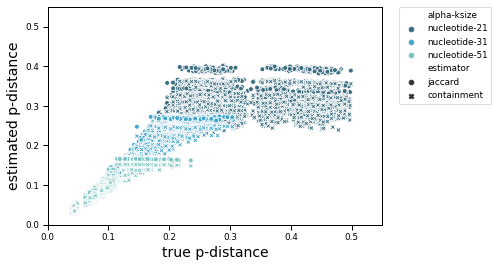

In [37]:
g=sns.scatterplot(data=nucl_only, x="p-distance", y='PC_pdist', hue="alpha-ksize", palette="GnBu_d", style = "estimator")#, )
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("true p-distance", size=14)
plt.ylabel("estimated p-distance", size=14)
g.set(xlim=(0, 0.55), ylim=(0, 0.55))
fig = g.get_figure()
#fig.savefig("estimated p-distance.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

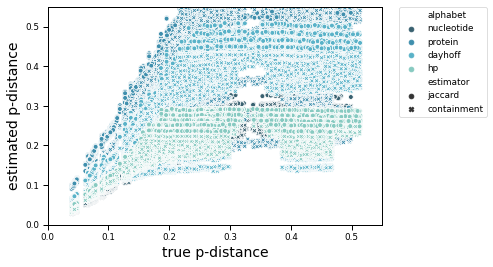

In [34]:
g=sns.scatterplot(data=meltedCompare, x="p-distance", y='estimated p-distance', hue="alphabet", palette="GnBu_d", style = "estimator")
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("true p-distance", size=14)
plt.ylabel("estimated p-distance", size=14)
g.set(xlim=(0, 0.55), ylim=(0, 0.55))

fig = g.get_figure()
#fig.savefig("estimated p-distance.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

In [91]:
jaccard_only = meltedCompare[meltedCompare["estimator"] == "jaccard"]
nucl_jaccard = jaccard_only[jaccard_only["alphabet"] == "nucleotide"]
contain_only = meltedCompare[meltedCompare["estimator"] == "containment"]
nucl_contain = contain_only[contain_only["alphabet"] == "nucleotide"]



[(0.0, 0.55), (0.0, 0.55)]

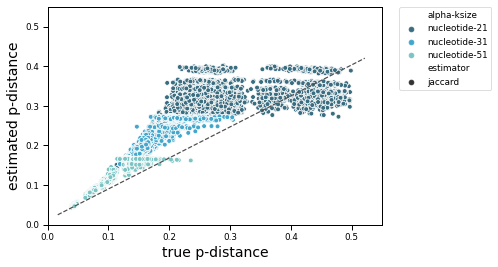

In [38]:
g=sns.scatterplot(data=nucl_jaccard, x="p-distance", y='PC_pdist', hue="alpha-ksize", palette="GnBu_d", style = "estimator")#, )
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#sns.lineplot(data=nucl_jaccard, x="p-distance", y="p-distance")
plt.xlabel("true p-distance", size=14)
plt.ylabel("estimated p-distance", size=14)
g.plot(g.get_xlim(), g.get_ylim(), ls="--", c=".3") #add 1:1 line.
g.set(xlim=(0, 0.55), ylim=(0, 0.55))

#fig = g.get_figure()


In [ ]:
put some transpancy or plotting on separate plots next to each other

In [50]:
k21 = meltedCompare[meltedCompare["ksize"] == "21"]


[(0.0, 0.55), (0.0, 0.55)]

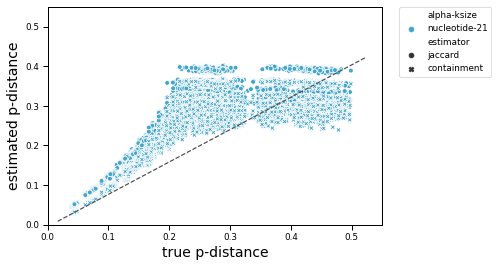

In [53]:
g=sns.scatterplot(data=k21, x="p-distance", y='PC_pdist', hue="alpha-ksize", palette="GnBu_d", style = "estimator")#, )
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("true p-distance", size=14)
plt.ylabel("estimated p-distance", size=14)
g.plot(g.get_xlim(), g.get_ylim(), ls="--", c=".3") #add 1:1 line.
g.set(xlim=(0, 0.55), ylim=(0, 0.55))


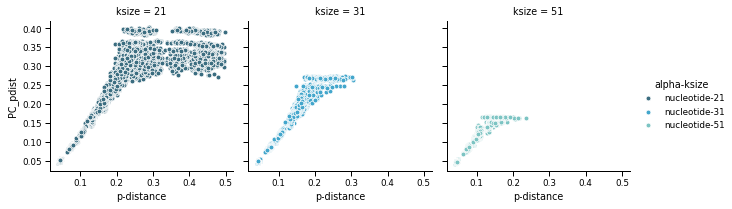

In [82]:
g = sns.FacetGrid(data=nucl_jaccard, col="ksize", hue="alpha-ksize",  palette="GnBu_d")
g.map(sns.scatterplot, "p-distance", 'PC_pdist')#, style = "estimator")#, hue="alpha-ksize", palette="GnBu_d", style = "estimator"))#, )
g.add_legend()
#lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.xlabel("true p-distance", size=14)
#plt.ylabel("estimated p-distance", size=14)
#g.plot(g.get_xlim(), g.get_ylim(), ls="--", c=".3") #add 1:1 line.
#g.set(xlim=(0, 0.55), ylim=(0, 0.55))


[(0.0, 0.55), (0.0, 0.55)]

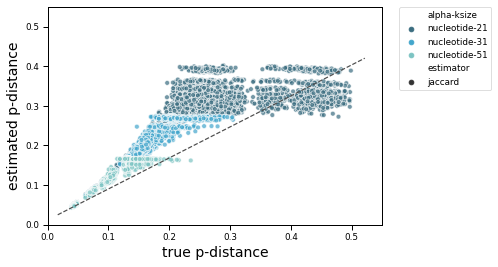

In [78]:
g=sns.scatterplot(data=nucl_jaccard, x="p-distance", y='PC_pdist', hue="alpha-ksize", palette="GnBu_d", style = "estimator",  alpha=.7)#, )
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#sns.lineplot(data=nucl_jaccard, x="p-distance", y="p-distance")
plt.xlabel("true p-distance", size=14)
plt.ylabel("estimated p-distance", size=14)
g.plot(g.get_xlim(), g.get_ylim(), ls="--", c=".3") #add 1:1 line.
g.set(xlim=(0, 0.55), ylim=(0, 0.55))

#fig = g.get_figure()


In [84]:
meltedCompare["true ANI"] = 1- meltedCompare["p-distance"] 
meltedCompare["estimated ANI"] = 1- meltedCompare["PC_pdist"] 

/Users/tessa/miniconda3/envs/forage-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/tessa/miniconda3/envs/forage-env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [85]:
meltedCompare

,name,p-distance,comparison_type,estimated p-distance,alphabet,ksize,alpha-ksize,scaled,estimator,PC_pdist,true ANI,estimated ANI
0,data-d0.80-f3-nogam-seed401,0.422172,nucleotide-k21-scaled1000.jaccard-pdist,0.285534,nucleotide,21,nucleotide-21,1000,jaccard,0.336220,0.577828,0.663780
1,data-d0.80-f3-nogam-seed402,0.430637,nucleotide-k21-scaled1000.jaccard-pdist,0.259742,nucleotide,21,nucleotide-21,1000,jaccard,0.300756,0.569363,0.699244
2,data-d0.80-f3-nogam-seed403,0.411224,nucleotide-k21-scaled1000.jaccard-pdist,0.284586,nucleotide,21,nucleotide-21,1000,jaccard,0.334894,0.588776,0.665106
3,data-d0.80-f3-nogam-seed404,0.435431,nucleotide-k21-scaled1000.jaccard-pdist,0.259297,nucleotide,21,nucleotide-21,1000,jaccard,0.300156,0.564569,0.699844
4,data-d0.80-f3-nogam-seed405,0.408047,nucleotide-k21-scaled1000.jaccard-pdist,0.251874,nucleotide,21,nucleotide-21,1000,jaccard,0.290183,0.591953,0.709817
...,...,...,...,...,...,...,...,...,...,...,...,...
311595,data-d0.15-f1-gamma-seed196,0.102482,hp-k42-scaled100.containment-pdist,0.103938,hp,42,hp-42,100,containment,0.109746,0.897518,0.890254
311596,data-d0.15-f1-gamma-seed197,0.109415,hp-k42-scaled100.containment-pdist,0.108930,hp,42,hp-42,100,containment,0.115332,0.890585,0.884668
311597,data-d0.15-f1-gamma-seed198,0.108960,hp-k42-scaled100.containment-pdist,0.107592,hp,42,hp-42,100,containment,0.113832,0.891040,0.886168
311598,data-d0.15-f1-gamma-seed199,0.107828,hp-k42-scaled100.containment-pdist,0.111599,hp,42,hp-42,100,containment,0.118332,0.892172,0.881668


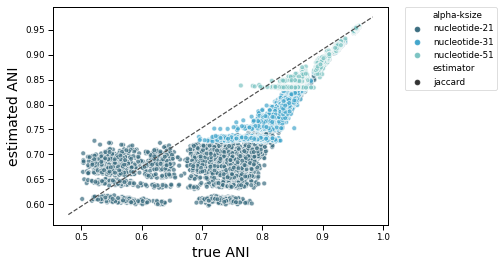

In [89]:
g=sns.scatterplot(data=nucl_jaccard, x="true ANI", y='estimated ANI', hue="alpha-ksize", palette="GnBu_d", style = "estimator",  alpha=.7)#, )
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#sns.lineplot(data=nucl_jaccard, x="p-distance", y="p-distance")
plt.xlabel("true ANI", size=14)
plt.ylabel("estimated ANI", size=14)
g.plot(g.get_xlim(), g.get_ylim(), ls="--", c=".3") #add 1:1 line.
#g.set(xlim=(0, 0.55), ylim=(0, 0.55))

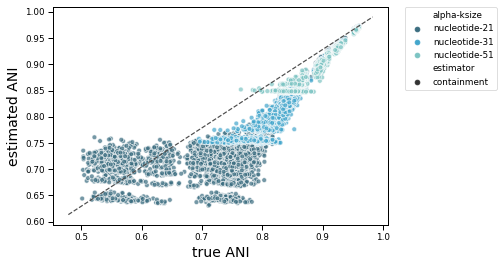

In [92]:
g=sns.scatterplot(data=nucl_contain, x="true ANI", y='estimated ANI', hue="alpha-ksize", palette="GnBu_d", style = "estimator",  alpha=.7)#, )
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("true ANI", size=14)
plt.ylabel("estimated ANI", size=14)
g.plot(g.get_xlim(), g.get_ylim(), ls="--", c=".3") #add 1:1 line.
#g.set(xlim=(0, 0.55), ylim=(0, 0.55))

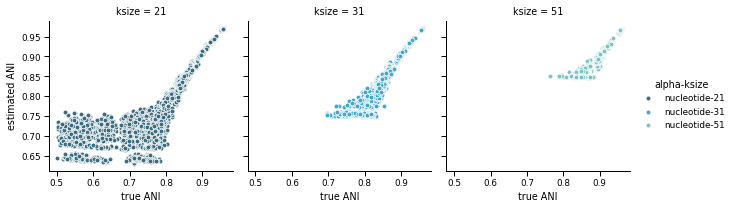

In [93]:
g = sns.FacetGrid(data=nucl_contain, col="ksize", hue="alpha-ksize",  palette="GnBu_d")
g.map(sns.scatterplot, "true ANI", 'estimated ANI')#, style = "estimator")#, hue="alpha-ksize", palette="GnBu_d", style = "estimator"))#, )
g.add_legend()

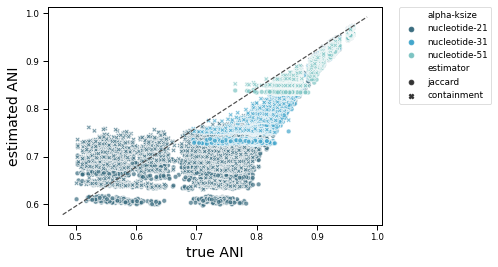

In [100]:
g=sns.scatterplot(data=nucl_only, x="true ANI", y='estimated ANI', hue="alpha-ksize", palette="GnBu_d", style = "estimator",  alpha=.7)#, )
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#sns.lineplot(data=nucl_jaccard, x="p-distance", y="p-distance")
plt.xlabel("true ANI", size=14)
plt.ylabel("estimated ANI", size=14)
g.plot(g.get_xlim(), g.get_ylim(), ls="--", c=".3") #add 1:1 line.
#g.set(xlim=(0, 0.55), ylim=(0, 0.55))

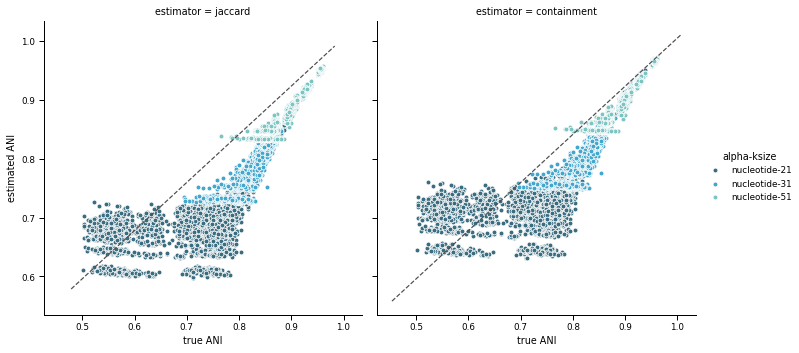

In [128]:
g = sns.FacetGrid(data=nucl_only, col="estimator", hue="alpha-ksize",  palette="GnBu_d", height=5, aspect=1)
g.map(sns.scatterplot, "true ANI", 'estimated ANI'))
for ax in g.fig.axes:
    ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")

g.add_legend()